In [213]:
#1 импортируем библиотеки
import pandas as pd               #библиотека для считывания файлов с данными
import numpy as np                  #библиотека для оругления значений?
import matplotlib.pyplot as plt     #библиотека для графиков
from scipy import stats        #библиотека для проверки гипотез

# Предобработка данных

In [214]:
file_path = pd.read_excel('C:/Users/Ounly mini/Desktop/новая работа/тестовое СберСпасибо/hw_1_dataset.xlsx')
file_path.head()

,datetime,promo,control_group_flg,customer_id,transaction_id,transaction_amt,monetary_amt,bonus_turn_amt
0,2020-01-02 17:10:09,Целевая 6% на Отток,False,212933236,106989004416,351.726307,176.569431,5.297083
1,2019-12-17 12:01:25,Контрольная 7% на Новых,True,247135596,105374806841,62.011184,62.011184,1.864573
2,2019-12-05 11:39:49,Целевая 6% на Отток,False,234967813,104137018370,163.856432,163.856432,9.831386
3,2019-12-09 16:41:33,Целевая 7% на Новых,False,213648274,104577635297,2402.756823,2402.756823,168.192978
4,2019-12-11 19:40:24,Целевая 7% на Новых,False,235025194,104807687619,266.972980,134.192768,9.393494


In [215]:
#выведем иформацию по имеющимся данным
file_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           23134 non-null  datetime64[ns]
 1   promo              23134 non-null  object        
 2   control_group_flg  23134 non-null  bool          
 3   customer_id        23134 non-null  int64         
 4   transaction_id     23134 non-null  int64         
 5   transaction_amt    23134 non-null  float64       
 6   monetary_amt       23134 non-null  float64       
 7   bonus_turn_amt     23134 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.3+ MB


In [216]:
#проверим наличие пропусков данных
print(file_path.isna().sum())

datetime             0
promo                0
control_group_flg    0
customer_id          0
transaction_id       0
transaction_amt      0
monetary_amt         0
bonus_turn_amt       0
dtype: int64


In [217]:
#наличие явных дубликатов
print('дубликатов =', file_path.duplicated().sum())

дубликатов = 0


In [218]:
#проверим наличие нулевых транзакций
file_path.query('monetary_amt < 0.1').count()

datetime             9
promo                9
control_group_flg    9
customer_id          9
transaction_id       9
transaction_amt      9
monetary_amt         9
bonus_turn_amt       9
dtype: int64

у 9 пользователей транзакции на нулевую сумму. Удалим этих пользователей

In [219]:
#перезапишем таблицу удалив пользователей с нулевыми суммами транзакции
file_path = file_path.query('monetary_amt > 0')

Соотношение колчества целевой и контрольной групп

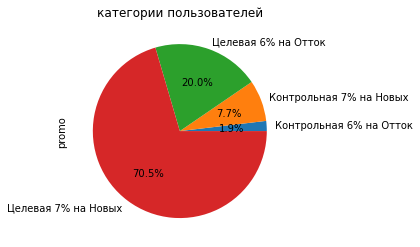

Целевая 7% на Новых        16295
Целевая 6% на Отток         4622
Контрольная 7% на Новых     1775
Контрольная 6% на Отток      433
Name: promo, dtype: int64


In [220]:
(file_path['promo']
    .value_counts(ascending=True)
    .plot(kind='pie', grid=True, title='категории пользователей', autopct='%1.1f%%'))

plt.show()
print(file_path['promo'].value_counts())

In [221]:
cnt_cust = file_path.pivot_table(index=['promo'], values='customer_id', aggfunc=['count'])
cnt_cust

,count
,customer_id
promo,
Контрольная 6% на Отток,433
Контрольная 7% на Новых,1775
Целевая 6% на Отток,4622
Целевая 7% на Новых,16295


In [222]:
cnt_cust = file_path.groupby(by='promo').agg({'customer_id':'nunique'})
print('Количество уникальных пользователей =', file_path['customer_id'].nunique())
cnt_cust

Количество уникальных пользователей = 18739


,customer_id
promo,
Контрольная 6% на Отток,342
Контрольная 7% на Новых,1474
Целевая 6% на Отток,3545
Целевая 7% на Новых,13378


Учтем что контрольная группа в 10 раз меньше целевой

посчитаем колличество заказов каждого пользователя

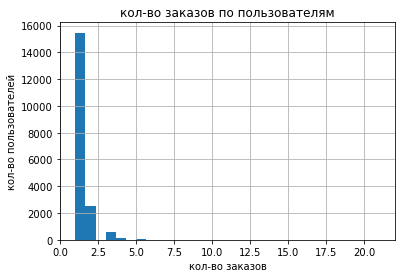

count    2.312500e+04
mean     1.055182e+11
std      9.351908e+08
min      1.038795e+11
25%      1.047570e+11
50%      1.054848e+11
75%      1.063006e+11
max      1.070389e+11
Name: transaction_id, dtype: float64

In [223]:
cnt_1['transaction_id'].plot(kind='hist', bins=30, title='кол-во заказов по пользователям', grid=True)
plt.xlabel("кол-во заказов")
plt.ylabel("кол-во пользователей")
plt.show()
file_path['transaction_id'].describe()

In [224]:
#кол-во заказов по пользователям
cnt_1['transaction_id'].value_counts()

1     15465
2      2493
3       563
4       150
5        46
6        15
7         5
9         1
21        1
Name: transaction_id, dtype: int64

In [225]:
#id пользователей по заказам
cnt_1 = file_path.groupby(by='customer_id').agg({'transaction_id':'count'}).sort_values(by='transaction_id')
cnt_1.tail()

,transaction_id
customer_id,
213660752,7
213076082,7
202970065,7
202436671,9
219774563,21


большинство пользователей сделали по 1 заказу. Есть выбросы 1 пользователь сделал 21 заказ.

In [226]:
file_path.query('customer_id == 219774563').head()

,datetime,promo,control_group_flg,customer_id,transaction_id,transaction_amt,monetary_amt,bonus_turn_amt
10408,2019-12-24 20:23:28,Целевая 6% на Отток,False,219774563,106148439233,107.354214,53.677107,1.610313
12574,2019-12-16 18:30:50,Целевая 6% на Отток,False,219774563,105298365840,107.354214,53.677107,1.610313
12575,2019-12-10 14:23:40,Целевая 6% на Отток,False,219774563,104690209224,107.354214,53.677107,1.610313
13695,2019-12-20 19:54:57,Целевая 6% на Отток,False,219774563,105717942750,107.354214,53.677107,1.610313
14732,2019-12-23 16:04:00,Целевая 6% на Отток,False,219774563,106014392149,107.354214,53.677107,1.610313


пользователь 219774563 заказывал один товар 20 раз. возможно его не нужно будет учитывать тк это возможный выброс

In [227]:
#срезы на контрольную и целевую группы
contr_gr = file_path.query('control_group_flg == True')
act_gr = file_path.query('control_group_flg == False')

In [228]:
#срезы целевых и контрольных групп для каждой акции
target_new = file_path.query('promo == "Целевая 7% на Новых"')
control_new = file_path.query('promo == "Контрольная 7% на Новых"')
target_retention = file_path.query('promo == "Целевая 6% на Отток"')
control_retention = file_path.query('promo == "Контрольная 6% на Отток"')

Анализ метрик:

- средний чек по каждому пользователю каждой группы

- средняя сумма по пользователям каждой группы


Средний оборот, медиана, минимум, максимум, количество - по транзакциям:

In [229]:
#Целевая 7% на Новых
target_new[['transaction_amt','monetary_amt','bonus_turn_amt']].describe()

,transaction_amt,monetary_amt,bonus_turn_amt
count,16295.000000,16295.000000,16295.000000
mean,668.948002,457.128493,28.848743
std,973.696038,742.514119,49.668164
min,2.514349,2.514349,0.084753
25%,122.489746,88.990993,5.353585
50%,344.592902,220.598785,13.150891
75%,839.460516,519.707402,32.262767
max,16809.409872,14437.729269,1010.641049


Целевая 7% на Новых:
средний чек у пользователей = 457р,
медиана = 220р

In [230]:
#количество рублей принесеные партнеру за 1 бонус
target_new['monetary_amt'].sum()/target_new['bonus_turn_amt'].sum()

15.84569902360077

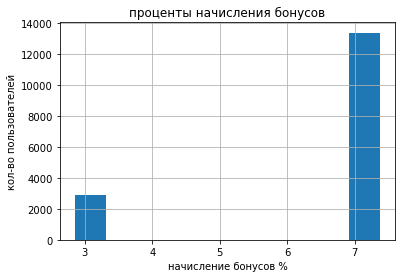

In [231]:
#соотношение новых пользователей и пользователей повторно сделавшие заказы
( (target_new['bonus_turn_amt']/target_new['monetary_amt']*100)
      .plot(kind='hist', bins=10, title='проценты начисления бонусов', grid=True) )

plt.xlabel("начисление бонусов %")
plt.ylabel("кол-во пользователей")
plt.show()


In [235]:
#контрольная 7% на Новых
control_new[['transaction_amt','monetary_amt','bonus_turn_amt']].describe()

,transaction_amt,monetary_amt,bonus_turn_amt
count,1775.000000,1775.000000,1775.000000
mean,638.001472,429.160743,12.875351
std,991.124677,733.091651,21.992639
min,2.825111,2.825111,0.084753
25%,122.892324,90.050410,2.697981
50%,351.726307,226.856406,6.808517
75%,801.512214,480.268853,14.408066
max,18443.454019,11888.038428,356.642000


Контрольная 7% на Новых:
средний чек у пользователей = 429р,
медиана = 226р

<AxesSubplot:>

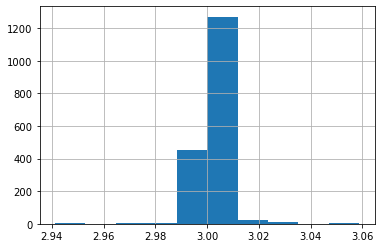

In [236]:
(control_new['bonus_turn_amt']/control_new['monetary_amt']*100).hist()

In [237]:
#количество рублей принесеные партнеру за 1 бонус
print('количество рублей принесеные партнеру за 1 бонус Контрольная группа на Новых =')
round(control_new['monetary_amt'].sum()/control_new['bonus_turn_amt'].sum(),2)

количество рублей принесеные партнеру за 1 бонус Контрольная группа на Новых =


33.33

In [238]:
#целевая 7% на Отток
target_retention[['transaction_amt','monetary_amt','bonus_turn_amt']].describe()

,transaction_amt,monetary_amt,bonus_turn_amt
count,4622.000000,4622.000000,4622.000000
mean,667.510523,469.840172,25.352611
std,1508.533444,1421.449394,84.474685
min,2.825111,2.825111,0.084753
25%,135.004987,92.946149,4.915693
50%,357.094018,223.579277,11.420511
75%,832.701439,511.980723,27.357668
max,84372.389133,84372.389133,5062.344478


целевая 6% на Отток:
средний чек у пользователей = 469р,
медиана = 223р

In [239]:
#количество рублей принесеные партнеру за 1 бонус
print('количество рублей принесеные партнеру за 1 бонус Целевая группа на отток =')
round(target_retention['monetary_amt'].sum()/target_retention['bonus_turn_amt'].sum(),2)

количество рублей принесеные партнеру за 1 бонус Целевая группа на отток =


18.53

In [240]:
#контрольная 7% на Отток
control_retention[['transaction_amt','monetary_amt','bonus_turn_amt']].describe()

,transaction_amt,monetary_amt,bonus_turn_amt
count,433.000000,433.000000,433.000000
mean,644.367117,467.240492,14.017770
std,821.632856,691.376668,20.741396
min,2.825111,2.825111,0.084753
25%,156.793655,108.908025,3.263003
50%,351.726307,243.242049,7.302912
75%,849.228337,538.183627,16.145509
max,6633.360400,5464.470764,163.941186


контрольная 6% на Отток:
средний чек у пользователей = 467р,
медиана = 243р

In [241]:
#количество рублей принесеные партнеру за 1 бонус
print('количество рублей принесеные партнеру за 1 бонус Контрольная группа на отток =')
round(control_retention['monetary_amt'].sum()/control_retention['bonus_turn_amt'].sum(),2)

количество рублей принесеные партнеру за 1 бонус Контрольная группа на отток =


33.33

# Гипотезы

Нулевая гипотеза: НЕТ статистически значимых различий между тратами контрольной и целевой группами.

Альтернативная гипотеза: ЕСТЬ статистически значимые различия в тратах между группами.

Выберем значение alpha = 0,05 Посчитаем статистическую значимость различий между контрольной и целевой группами.

In [247]:
#Оценка эффективности акции:

#Оценка статистической значимости:


# Тест для группы "Новые"
t_stat_new, p_val_new = stats.ttest_ind(target_new['monetary_amt'], control_new['monetary_amt'])

# Тест для группы "Отток"
t_stat_retention, p_val_retention = stats.ttest_ind(target_retention['monetary_amt'], control_retention['monetary_amt'])

In [248]:
p_val_new

0.13136137341776916

In [249]:
p_val_retention

0.9699766383290425

In [250]:
t_stat_new

1.5088235216392658

In [251]:
t_stat_retention

0.037639452728427975

Не получилось отвергнуть нулевую гипотезу, нет оснований считать траты контрольных и целевых группы разными поскольку p-значение > 0.05

# Саммари-таблица 

In [252]:
# Группировка по акциям и контрольной и целевой группе
grouped = file_path.groupby(['promo', 'control_group_flg']).agg(
    unique_customers=('customer_id', 'nunique'),
    total_transactions=('transaction_id', 'count'),
    total_transaction_amt=('transaction_amt', 'sum'),
    total_monetary_amt=('monetary_amt', 'sum'),
    total_bonus_amt=('bonus_turn_amt', 'sum'),
    avg_monetary_check=('monetary_amt', 'mean')
   ).reset_index()


# Создание читаемых названий групп
grouped['promo'] = grouped.apply(
    lambda x: f"{'Контрольная' if x['control_group_flg'] else 'Целевая'} — {x['promo'].split()[-1]}", axis=1 )

grouped

,promo,control_group_flg,unique_customers,total_transactions,total_transaction_amt,total_monetary_amt,total_bonus_amt,avg_monetary_check
0,Контрольная — Отток,True,342,433,2.790110e+05,2.023151e+05,6069.694273,467.240492
1,Контрольная — Новых,True,1474,1775,1.132453e+06,7.617603e+05,22853.748775,429.160743
2,Целевая — Отток,False,3545,4622,3.085234e+06,2.171601e+06,117179.766399,469.840172
3,Целевая — Новых,False,13378,16295,1.090051e+07,7.448909e+06,470090.261422,457.128493


поскольку целевая группа пользователей гораздо больше контрольной можно предположить что в целевой группе пользователи сделали заказ именно изза рассылки,
по этой причине в контрольной группе пользователи не совершали заказов.

посчитаем дополнительный прирост от акций

In [253]:
# доп прирост от акций
# Расчет среднего рублевого оборота на клиента
def calc_effect(df, target_name, control_name, target_clients):
    target_avg = df.loc[df['promo'] == target_name, 'total_monetary_amt'].values[0] / \
                 df.loc[df['promo'] == target_name, 'unique_customers'].values[0]
    control_avg = df.loc[df['promo'] == control_name, 'total_monetary_amt'].values[0] / \
                  df.loc[df['promo'] == control_name, 'unique_customers'].values[0]
    uplift = target_avg - control_avg
    total_gain = uplift * target_clients
    return round(target_avg, 2), round(control_avg, 2), round(uplift, 2), round(total_gain, 2)

# Расчёты для двух акций
results = {
    '7% на Новых': calc_effect(grouped, 'Целевая — Новых', 'Контрольная — Новых', 459939),
    '6% на Отток': calc_effect(grouped, 'Целевая — Отток', 'Контрольная — Отток', 32224),
}

results

{'7% на Новых': (556.8, 516.8, 40.0, 18399779.09),
 '6% на Отток': (612.58, 591.56, 21.02, 677243.53)}

акции показали положительный эффект. 

акция 7% на новых дала 18.4 млн.

акция 6% на отток дала 677 тыс.

